In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

In [3]:
data=pd.read_csv('crime_data.csv')
data.head()

,city,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [4]:
data1=data.drop(['city'],axis=1)
data1.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   city      50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [6]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


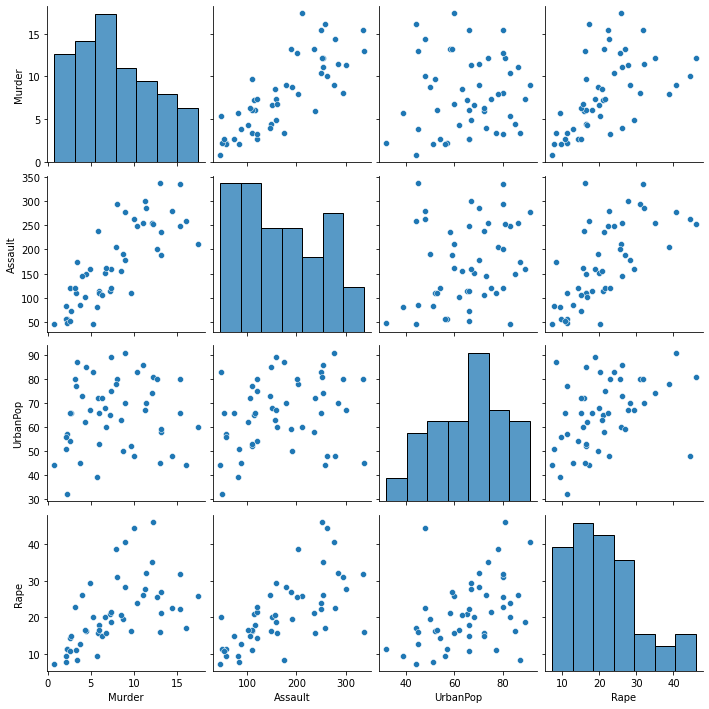

In [7]:
sns.pairplot(data1)

In [8]:
scale=MinMaxScaler()
data2=pd.DataFrame(scale.fit_transform(data1))
data2.head()

,0,1,2,3
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


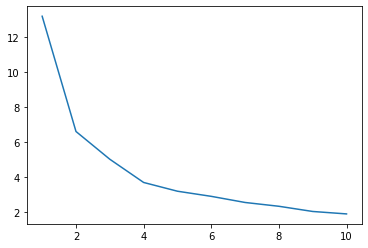

In [9]:
wcss=[]
for i in range(1,11):
    clf=KMeans(n_clusters=i)
    clf.fit(data2)
    wcss.append(clf.inertia_)
plt.plot(range(1,11),wcss)

In [10]:
clf=KMeans(n_clusters=4)
kmeans=clf.fit_predict(data2)
kmeans

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2])

In [11]:
clf.labels_

array([3, 0, 0, 3, 0, 0, 2, 2, 0, 3, 2, 1, 0, 2, 1, 2, 1, 3, 1, 0, 2, 0,
       1, 3, 2, 1, 1, 0, 1, 2, 0, 0, 3, 1, 2, 2, 2, 2, 2, 3, 1, 3, 0, 2,
       1, 2, 2, 1, 1, 2])

In [12]:
data['cluster']=clf.labels_
data

,city,Murder,Assault,UrbanPop,Rape,cluster
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,0
3,Arkansas,8.8,190,50,19.5,3
4,California,9.0,276,91,40.6,0
5,Colorado,7.9,204,78,38.7,0
6,Connecticut,3.3,110,77,11.1,2
7,Delaware,5.9,238,72,15.8,2
8,Florida,15.4,335,80,31.9,0
9,Georgia,17.4,211,60,25.8,3


In [13]:
data.iloc[:,1:5].groupby(data.cluster).mean()

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,10.966667,264.000000,76.500000,33.608333
1,3.600000,78.538462,52.076923,12.176923
2,5.852941,141.176471,73.647059,19.335294
3,13.937500,243.625000,53.750000,21.412500


<AxesSubplot:xlabel='UrbanPop', ylabel='Rape'>

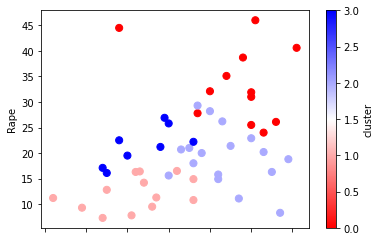

In [14]:
data.plot(x='UrbanPop',y='Rape',c='cluster',s=50,kind='scatter',cmap=plt.cm.bwr_r)

In [15]:
silhouette_score(data1,kmeans)

0.2333659874278873